In [36]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,average_precision_score
from sklearn.metrics import precision_score,recall_score,f1_score,precision_recall_curve

In [37]:
car_data = pd.read_csv("car.csv") 

In [38]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
buying      1151 non-null object
maint       1151 non-null object
doors       1151 non-null int64
persons     1151 non-null int64
lug_boot    1151 non-null object
safety      1151 non-null object
class       1151 non-null object
dtypes: int64(2), object(5)
memory usage: 63.0+ KB


In [39]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [40]:
car_data.describe()

,doors,persons
count,1151.000000,1151.000000
mean,3.501303,3.000869
std,1.118130,1.000434
min,2.000000,2.000000
25%,3.000000,2.000000
50%,4.000000,4.000000
75%,4.500000,4.000000
max,5.000000,4.000000


In [41]:
y=car_data['class']
y=y.to_frame()
y.head()

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [42]:
X=car_data
X= X[['buying','maint','doors','persons','lug_boot', 'safety']]
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [43]:
#Applying Train,Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [44]:
combine=[y_train,y_test]
classmapping={'unacc':0,'acc':1,'good':2,'vgood':3}
for dt in combine:
   dt['class']=car_data['class'].map(classmapping)
y_train.head()

,class
921,0
721,0
501,1
432,0
711,0


In [45]:
combine=[X_train,X_test]
classmapping={'high':0,'low':1,'med':2,'vhigh':3}
for dt in combine:
   dt['buying']=car_data['buying'].map(classmapping)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
921,1,vhigh,5,2,med,med
721,2,med,2,2,small,high
501,0,med,5,4,big,med
432,0,med,2,2,small,med
711,2,high,5,4,small,med


In [46]:
combine=[X_train,X_test]
classmapping={'high':0,'low':1,'med':2,'vhigh':3}
for dt in combine:
   dt['maint']=car_data['maint'].map(classmapping)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
921,1,3,5,2,med,med
721,2,2,2,2,small,high
501,0,2,5,4,big,med
432,0,2,2,2,small,med
711,2,0,5,4,small,med


In [47]:
combine=[X_train,X_test]
classmapping={'big':0,'small':1,'med':2}
for dt in combine:
   dt['lug_boot']=car_data['lug_boot'].map(classmapping)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
921,1,3,5,2,2,med
721,2,2,2,2,1,high
501,0,2,5,4,0,med
432,0,2,2,2,1,med
711,2,0,5,4,1,med


In [48]:
combine=[X_train,X_test]
classmapping={'high':0,'low':1,'med':2}
for dt in combine:
   dt['safety']=car_data['safety'].map(classmapping)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
921,1,3,5,2,2,2
721,2,2,2,2,1,0
501,0,2,5,4,0,2
432,0,2,2,2,1,2
711,2,0,5,4,1,2


In [49]:
#AdaBoost
clf =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
clf.fit(X_train, y_train)  

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [50]:
y_pred = clf.predict(X_test)  

In [51]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [52]:
y_test.head()

,class
19,0
819,1
802,2
528,0
905,0


In [53]:
print(confusion_matrix(y_test, y_pred))  

[[254   9   0   0]
 [ 11  48   0   0]
 [  0  16   0   0]
 [  0   8   0   0]]


In [54]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       263
           1       0.59      0.81      0.69        59
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         8

   micro avg       0.87      0.87      0.87       346
   macro avg       0.39      0.44      0.41       346
weighted avg       0.83      0.87      0.85       346



In [55]:
accuracy_test_ada=round(clf.score(X_test,y_test)*100,2)
accuracy_train_ada=round(clf.score(X_train,y_train)*100,2)
accuracy_ada=round(accuracy_score(y_test, y_pred)*100,2)
print('Training accuracy of Ada Boosted Decision Tree',accuracy_train_ada)
print('Testing accuracy of Ada Boosted Decision Tree',accuracy_test_ada)
print('Accuracy of Ada Boosted Decision Tree:',accuracy_ada)


Training accuracy of Ada Boosted Decision Tree 88.32
Testing accuracy of Ada Boosted Decision Tree 87.28
Accuracy of Ada Boosted Decision Tree: 87.28


In [56]:
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['unacc','acc','good','vgood'], 
                     columns = ['unacc','acc','good','vgood'])

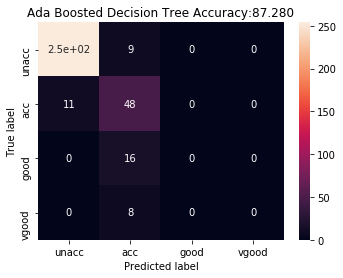

In [57]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Ada Boosted Decision Tree Accuracy:{0:.3f}'.format(accuracy_test_ada))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [58]:
pprf = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Ada Boosted Decision Tree precision_recall_fscore_support ", pprf)
pps = precision_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("Ada Boosted Decision Tree precision_score -> %.2f"%pps)
prs = recall_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("Ada Boosted Decision Tree recall_score -> %.2f"%prs)
pf1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('Ada Boosted Decision Tree f1 score -> %.2f'%pf1)

Ada Boosted Decision Tree precision_recall_fscore_support  (0.3877707896575821, 0.4448346974286267, 0.41195887445887447, None)
Ada Boosted Decision Tree precision_score -> 0.39
Ada Boosted Decision Tree recall_score -> 0.44
f1_score 0.41195887445887447
Ada Boosted Decision Tree f1 score -> 0.41


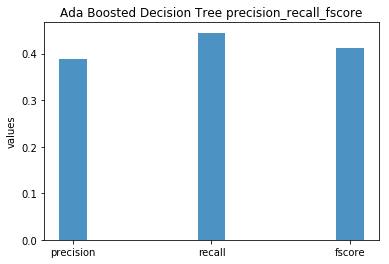

In [59]:
plt.bar(['precision','recall','fscore'], [pps,prs,pf1], align='center', alpha=0.8,width=.2)
plt.ylabel('values')
plt.title('Ada Boosted Decision Tree precision_recall_fscore')
plt.show()

In [60]:
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
y_pred = clf.predict(X_test)  

In [62]:
y_pred

array([0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 3, 1, 3, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 3, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 1, 0, 1, 0, 0,

In [63]:
y_test.head()

,class
19,0
819,1
802,2
528,0
905,0


In [64]:
print(confusion_matrix(y_test, y_pred))  

[[255   8   0   0]
 [  1  54   3   1]
 [  0  12   4   0]
 [  0   2   0   6]]


In [65]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       263
           1       0.71      0.92      0.80        59
           2       0.57      0.25      0.35        16
           3       0.86      0.75      0.80         8

   micro avg       0.92      0.92      0.92       346
   macro avg       0.78      0.72      0.73       346
weighted avg       0.92      0.92      0.92       346



In [66]:
accuracy_test_rf=round(clf.score(X_test,y_test)*100,2)
accuracy_train_rf=round(clf.score(X_train,y_train)*100,2)
accuracy_rf=round(accuracy_score(y_test, y_pred)*100,2)
print('Training accuracy of RandomForestClassifier:',accuracy_train_rf)
print('Testing accuracy of RandomForestClassifier:',accuracy_test_rf)
print('Accuracy of RandomForestClassifier:',accuracy_rf)

Training accuracy of RandomForestClassifier: 100.0
Testing accuracy of RandomForestClassifier: 92.2
Accuracy of RandomForestClassifier: 92.2


In [67]:
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['unacc','acc','good','vgood'], 
                     columns = ['unacc','acc','good','vgood'])

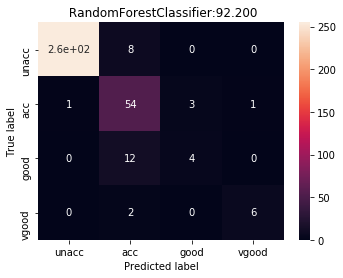

In [68]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(' RandomForestClassifier:{0:.3f}'.format(accuracy_test_rf))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [69]:
pprf = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("RandomForestClassifier precision_recall_fscore_support ", pprf)
pps = precision_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("RandomForestClassifier precision_score -> %.2f"%pps)
prs = recall_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("RandomForestClassifier recall_score -> %.2f"%prs)
pf1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('RandomForestClassifier f1 score -> %.2f'%pf1)

RandomForestClassifier precision_recall_fscore_support  (0.7837978735902256, 0.7212089965843913, 0.7326212616235235, None)
RandomForestClassifier precision_score -> 0.78
RandomForestClassifier recall_score -> 0.72
f1_score 0.7326212616235235
RandomForestClassifier f1 score -> 0.73


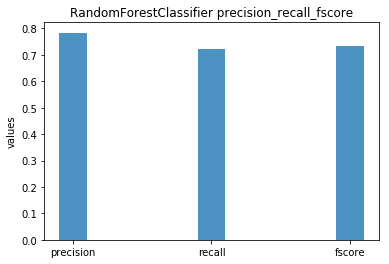

In [70]:
plt.bar(['precision','recall','fscore'], [pps,prs,pf1], align='center', alpha=0.8,width=.2)
plt.ylabel('values')
plt.title('RandomForestClassifier precision_recall_fscore')
plt.show()